In [1]:
import matplotlib.pylab as plt
import numpy as np

# Ejercicio 1
Haga uso de la cuadratura de Gauss, el metodo de trapecio y la regla de simpson para calcular las siguientes integrales:
$$\int_{0}^{\infty}\left(\frac{\sin(x)}{x}\right)^{n}dx,$$
con $n=1,\ldots ,6$, a partir de sus resultados estime el resultado de la integral.
¿Cómo puede determinar con que valor quedarse de la integral?
¿Que estimado obtiene de la integral?
Prepare una grafica del valor de la integral en función del numero de pasos para el caso de la cuadratura.
¿Cómo puede explicar el comportamiento que este exhibe?

El valor que puede ser el más fiel es aquel que oscile menos, es decir que en función del numero de pasos, no cambie drasticamente.

In [13]:
def integra(f,n_exponente, a, b, n_points=10, metodo="trapecio"):
    # Genera siempre un numero impar de puntos
    if n_points%2 == 0:
        n_points = n_points + 1

    if metodo=="trapecio":
        x = np.linspace(a, b, n_points)
        h = x[1] - x[0]
        w = np.ones(n_points) * h
        w[0] = h/2
        w[-1] = h/2
    elif metodo=="simpson":
        x = np.linspace(a, b, n_points)
        h = x[1] - x[0]
        w = np.ones(n_points) 
        ii = np.arange(n_points)
        w[ii%2!=0] = 4.0*h/3.0
        w[ii%2==0] = 2.0*h/3.0
        w[0] = h/3
        w[-1] = h/3
    elif metodo=="cuadratura":
        y, wprime = np.polynomial.legendre.leggauss(n_points)
        x = 0.5*(b+a) + 0.5*(b-a)*y
        w = 0.5*(b-a)*wprime
    else:
        print('metodo no implementado')
        x = np.zeros(n_points)
        y = np.zeros(n_points)

    return np.sum(f(x,n_exponente)*w)

In [14]:
def func(x,n):
    return (np.sin(x)/(x))**n

Probamos entonces los tres metodos para vizualizar cual es más estable, para hacer la integración con los tres metodos, veamosprimero como se comporta el valor de la integral para un numero "grande", no nos va a importar encontrar el valor exacto acá, si no que queremos ver cuando se estabilizan los valores que arroja esta integral. (tomemos entonces nuestro limite superior como $100000$)

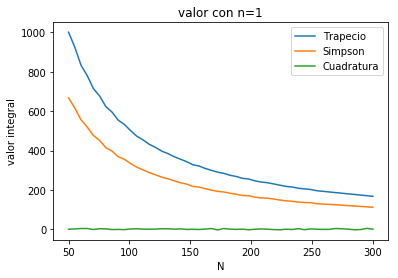

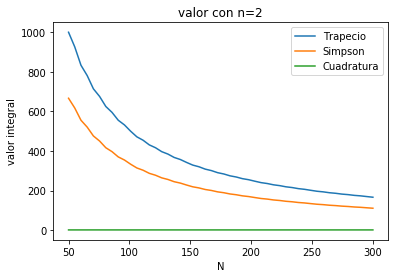

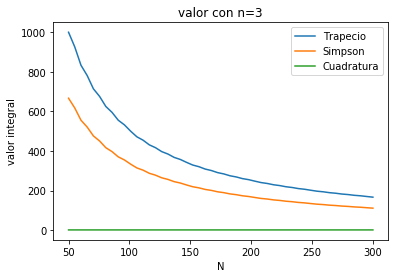

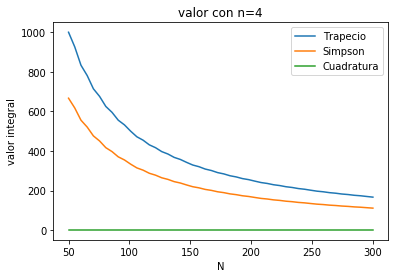

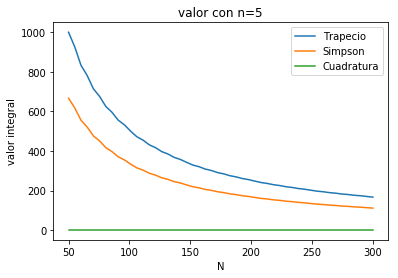

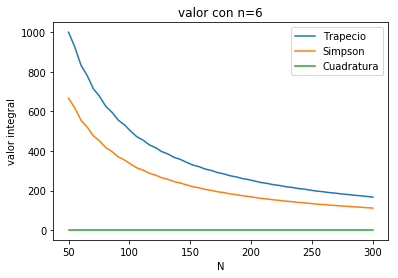

In [20]:
N = np.linspace(50,300)
sup=100000
for n_exp in range(1,7):
    trapecio=[]
    simpson=[]
    gauss=[]
    for n_points in N:
        n_points=int(n_points)
        a=integra(func,n_exp ,1E-12, sup, n_points=n_points, metodo="trapecio")
        b=integra(func,n_exp, 1E-12, sup, n_points=n_points, metodo="simpson")
        c=integra(func,n_exp, 1E-12, sup, n_points=n_points, metodo="cuadratura")
        trapecio.append(a)
        simpson.append(b)
        gauss.append(c)
    plt.figure()
    plt.title("valor con n={}".format(n_exp))
    plt.plot(N, trapecio, label="Trapecio")
    plt.plot(N, simpson, label="Simpson")
    plt.plot(N, gauss, label="Cuadratura")
    plt.xlabel('N')
    plt.ylabel('valor integral')
    plt.legend()
    plt.show()

Con esto concluimos que para cada caso, el mejor metodo es la Cuadratura de gauss, pues parece estabilizarse inmediatamente.

Ahora cambiemos la función anterior para que la cuadratura de gauss pueda integrar hasta infinito([Libro de Landau Paez](https://www.dsf.unica.it/~fiore/survey.pdf) paginas 136-137.)

In [39]:
def integra(f,n_exponente, a, b, n_points=10, metodo="trapecio"):
    # Genera siempre un numero impar de puntos
    if n_points%2 == 0:
        n_points = n_points + 1
    if metodo=="trapecio":
        x = np.linspace(a, b, n_points)
        h = x[1] - x[0]
        w = np.ones(n_points) * h
        w[0] = h/2
        w[-1] = h/2
    elif metodo=="simpson":
        x = np.linspace(a, b, n_points)
        h = x[1] - x[0]
        w = np.ones(n_points) 
        ii = np.arange(n_points)
        w[ii%2!=0] = 4.0*h/3.0
        w[ii%2==0] = 2.0*h/3.0
        w[0] = h/3
        w[-1] = h/3
    elif metodo=="cuadratura":
        y, wprime = np.polynomial.legendre.leggauss(n_points)
        x = (1+y)/(1-y) #transformacion
        w = 2*wprime/(1-y)**2
    else:
        print('metodo no implementado')
        x = np.zeros(n_points)
        y = np.zeros(n_points)
    return np.sum(f(x,n_exponente)*w)

Ahora calculamos el valor de la integral para un conjunto de puntos entre $700$ y $1000$  y para mejorar nuestros resultados, tomamos el promedio de los resultados sobre este intervalo.

El valor de la integral es: 1.4427485110185774


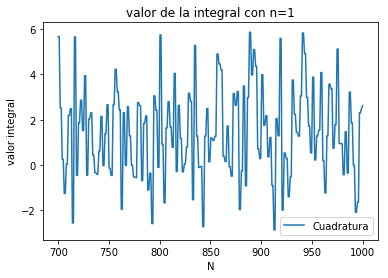

El valor de la integral es: 1.5707967445780227


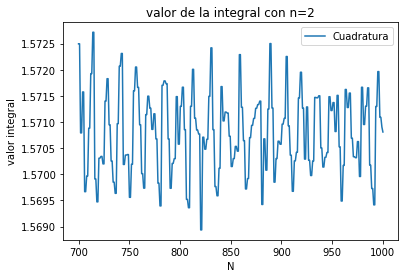

El valor de la integral es: 1.1780972484595333


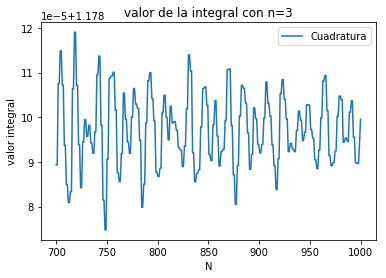

El valor de la integral es: 1.0471975525626613


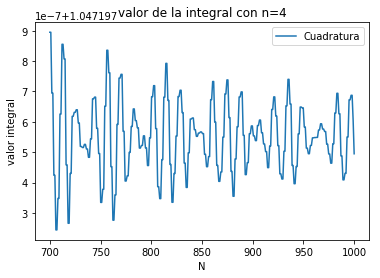

El valor de la integral es: 0.9408415499231929


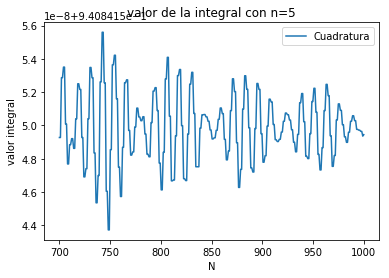

El valor de la integral es: 0.8639379797377963


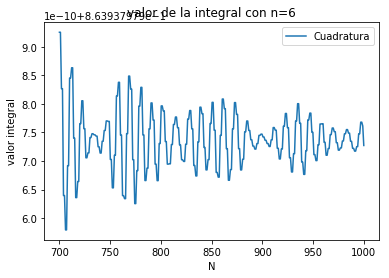

In [45]:
sup=np.inf
N=np.linspace(700,1000,300)
integral_numerica=[]
for n_exp in range(1,7):
    gauss=[]
    for n_points in N:
        n_points=int(n_points)
        c=integra(func,n_exp, 1E-12, sup, n_points=n_points, metodo="cuadratura")
        gauss.append(c)
    aux=np.trapz(gauss,N)/(np.max(N)-np.min(N))
    print("El valor de la integral es:",aux)
    integral_numerica.append(aux)
    plt.figure(figsize=(6,4))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.title("valor de la integral con n={}".format(n_exp))
    plt.plot(N, gauss, label="Cuadratura")
    #plt.yscale("log")
    plt.xlabel('N')
    plt.ylabel('valor integral')
    plt.legend()
    plt.show()

In [47]:
integral_teorica=[np.pi/2.0,np.pi/2.0,3.0*np.pi/8.0,2.0*np.pi/6.0,115.0*np.pi/384.0,11.0*np.pi/40.0]
for i in range(len(integral_numerica)):
    T = integral_teorica[i]
    N = integral_numerica[i]
    print("error en la integral numerica con n= ",i+1,"es =",np.abs(T-N)/N *100,"%")

error en la integral numerica con n=  1 es = 8.87526930704768 %
error en la integral numerica con n=  2 es = 2.6596892789368456e-05 %
error en la integral numerica con n=  3 es = 2.854909412190785e-07 %
error en la integral numerica con n=  4 es = 1.3044947471995318e-07 %
error en la integral numerica con n=  5 es = 2.125709431862386e-09 %
error en la integral numerica con n=  6 es = 6.983084500630579e-11 %


A medida que aumenta $n$ se tiene que el error se reduce cada vez más. [Referencia](http://mathworld.wolfram.com/SincFunction.html)

# Ejercicio 2
Haciendo uso de un metodo de Monte Carlo calcule la siguiente integral:

$$I=\int_{0}^{1}\int_{0}^{1}\int_{0}^{1}xyz\log(x+2y+3z)\sin(x+y+z)dxdydz$$

Primero, por otros metodos se puede obtener que la integral tiene un valor aproximadamente de:
$$I\approx 0.1384$$

Podemos generar numeros aleatorios independientes tales que caigan en el intervalo de integración y luego promediar estos valores.

In [48]:
def f(x,y,z):
    return x*y*z*np.log(x+2*y+3*z)*np.sin(x+y+z)
N=10000
integral=0
for i in range(N):
    x_i=np.random.uniform(0,1)
    y_i=np.random.uniform(0,1)
    z_i=np.random.uniform(0,1)
    integral += f(x_i,y_i,z_i)/N
integral=integral
print(integral)

0.1375803110037729


De igual forma podemos hacer uso del algoritmo de metropolis hastings para evaluar esta integral, se usa una funcion $p$ para verificar si se acepta o no el valor. el algoritmo entonces será como sigue:

- Inicialice $\vec{X}=(x_1,y_1,z_1)$ tal que $\vec{X}\in[0,1]^3$.
- for $n = 1$ hasta $N$
- Proponga un $\vec{Y}$ a partir de una distribución aleatoria ( puede ser gaussiana)
- tomemos $\alpha=\min(1, p(\vec{Y})/p(\vec{x})$
- genere un numero aleatorio entre 0 y 1 $r$
- Si $\vec{Y}\in [0,1]^3$ y $r<\alpha$, ponga $\vec{X}=\vec{Y}$ y calcule $f(\vec{x})$


tomando $g(x,y,z)=\sin(x+y+z)$, se tiene que:
$$K=\int_{0}^{1}\int_{0}^{1}\int_{0}^{1}\sin(x+y+z)dxdydz=\cos(3)-3\cos(2)-3\cos(1)-1,$$
Se tiene entonces que $I$ puede ser aproximada como:
$$I\approx \frac{K}{N}\sum_i f(x_i,y_i,z_i)$$

con $f(x,y,z)=xyz\log(x+2y+3z)$

In [78]:
def p(x):
    return np.sin(x[0]+x[1]+x[2])
def f(x):
    return x[0]*x[1]*x[2]*np.log(x[0]+2*x[1]+3*x[2])
N=50000
x=np.ones(3)/2
K=np.cos(3)-3*np.cos(2)+3*np.cos(1)-1
sigma=0.1
integral=[f(x)]
for i in range(N):
    y=x+np.random.normal(0,sigma,size=3)
    r=np.random.random()
    alpha=min(1,p(y)/p(x))
    if r < alpha and np.min(y)>0 and np.max(y)<1:
        x=y
        integral.append(K*f(x))
    else:
        integral.append(K*f(x))
integral=np.array(integral)

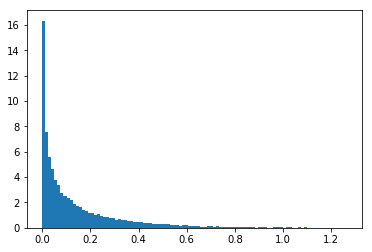

El valor de la integral es: 0.13396259335641292 +/- 0.0016028925788706828


In [79]:
datos,bins,_=plt.hist(integral,bins=100,density=True)
plt.show()
print("El valor de la integral es:",np.average(bins[:-1],weights=datos),"+/-",2*np.std(integral)/np.sqrt(N))

Tambien se puede hacer tomando $p=\log(x+2y+3z)\sin(x+y+z)$, salvo que acá $K$ es una cosa a determinar.

In [80]:
def p(x):
    return np.sin(x[0]+x[1]+x[2])*np.log(x[0]+2*x[1]+3*x[2])
def f(x):
    return x[0]*x[1]*x[2]

In [81]:
N=50000
x=np.ones(3)/2
sigma=0.1
integral=[f(x)]
K=[]
for i in range(N):
    y=x+np.random.normal(0,sigma,size=3)
    r=np.random.random()
    alpha=min(1,p(y)/p(x))
    if r < alpha and np.min(y)>0 and np.max(y)<1:
        x=y
        integral.append(f(x))
        K.append(p(x))
    else:
        integral.append(f(x))
        K.append(p(x))
integral=np.array(integral)/np.mean(K)

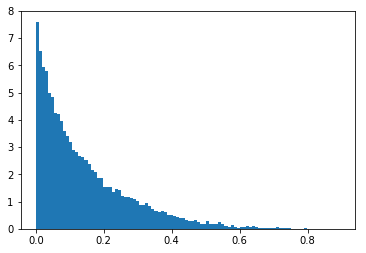

El valor de la integral es: 0.13695480248189681 +/- 0.0011839598416664252


In [82]:
datos,bins,_=plt.hist(integral,bins=100,density=True)
plt.show()
print("El valor de la integral es:",np.average(bins[:-1],weights=datos),"+/-",2*np.std(integral)/np.sqrt(N))